### 사이킷런으로 회귀분석

- from sklearn.linear_model import LinearRegression

In [26]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [27]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["PRICE"] =pd.DataFrame(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
from sklearn.model_selection import train_test_split

x= boston_df[['CRIM','RM','LSTAT']]
y= boston_df[["PRICE"]]

X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state = 102)


In [29]:
import matplotlib.pyplot as plt

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(x_test)
y_pred

array([[ 5.43992518],
       [26.37917636],
       [18.94428761],
       [27.19624222],
       [28.7577541 ],
       [11.54320186],
       [22.60382108],
       [18.56894956],
       [ 5.5189754 ],
       [11.83167992],
       [23.13446345],
       [27.13803424],
       [12.31630087],
       [21.34604968],
       [36.30714108],
       [18.43268868],
       [16.75470946],
       [31.76210091],
       [20.34310735],
       [27.90833785],
       [36.19906964],
       [23.0030261 ],
       [26.86862663],
       [25.96625858],
       [33.1261359 ],
       [26.63207448],
       [20.48925033],
       [31.19211744],
       [17.01086054],
       [ 9.19879965],
       [18.76990631],
       [32.16141671],
       [25.62685655],
       [25.62862505],
       [27.68600476],
       [29.32264526],
       [14.26393235],
       [18.39887075],
       [17.41832321],
       [21.10665804],
       [23.36515342],
       [26.43292936],
       [27.98500278],
       [28.36152478],
       [20.5678498 ],
       [37

In [32]:
mse = mean_squared_error(y_test,y_pred)
mse

28.05204389950628

In [33]:
r2 = r2_score(y_test,y_pred)
r2

0.6355016044016517

In [34]:
print("절편(베타이):",lr.intercept_)
print("회귀계수:;",lr.coef_)

절편(베타이): [-2.1790669]
회귀계수:; [[-0.11503944  5.19512234 -0.5967032 ]]


In [35]:
coeff = pd.DataFrame(lr.coef_.T,index =x.columns,columns=["coeff"])
coeff

,coeff
CRIM,-0.115039
RM,5.195122
LSTAT,-0.596703


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)


r2 = r2_score(y_test,y_pred)
print("r2 : ",r2)
print("절편(베타이):",lr.intercept_)
print("회귀계수:;",lr.coef_)

coeff = pd.DataFrame(lr.coef_.T,index =x.columns,columns=["coeff"])
coeff

r2 :  0.6355016044016517
절편(베타이): [-2.1790669]
회귀계수:; [[-0.11503944  5.19512234 -0.5967032 ]]


,coeff
CRIM,-0.115039
RM,5.195122
LSTAT,-0.596703


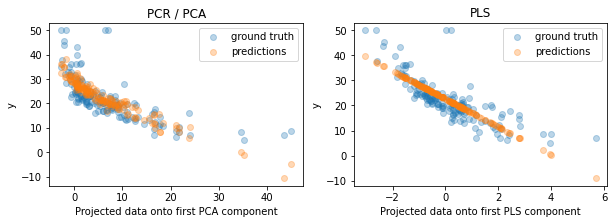

In [37]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()




In [38]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared 0.591
PLS r-squared 0.617


In [39]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")

PCR r-squared with 2 components 0.553
